In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

In [35]:
wine_data = pd.read_csv('data\\winequality.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [36]:
wine_data.shape

(4898, 12)

In [37]:
wine_data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [38]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4882 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4865 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [39]:
wine_data.isna().sum() 

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide     16
total sulfur dioxide     0
density                  0
pH                      33
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [40]:
wine_data.isna().sum() / len(wine_data) * 100

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.326664
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.673744
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [41]:
from sklearn.impute import SimpleImputer
sim_imp = SimpleImputer(strategy = 'mean')
sim_imp.fit(wine_data)
imp_data = sim_imp.transform(wine_data)
wine_imputed = pd.DataFrame(imp_data, columns = wine_data.columns)

In [42]:
wine_imputed.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [43]:
wine_imputed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308890,138.360657,0.994027,3.188025,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,16.980798,42.498065,0.002991,0.150511,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [44]:
corr_matrix = wine_imputed.corr()
corr_matrix['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.435575
pH                      0.097593
sulphates               0.053678
free sulfur dioxide     0.008091
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

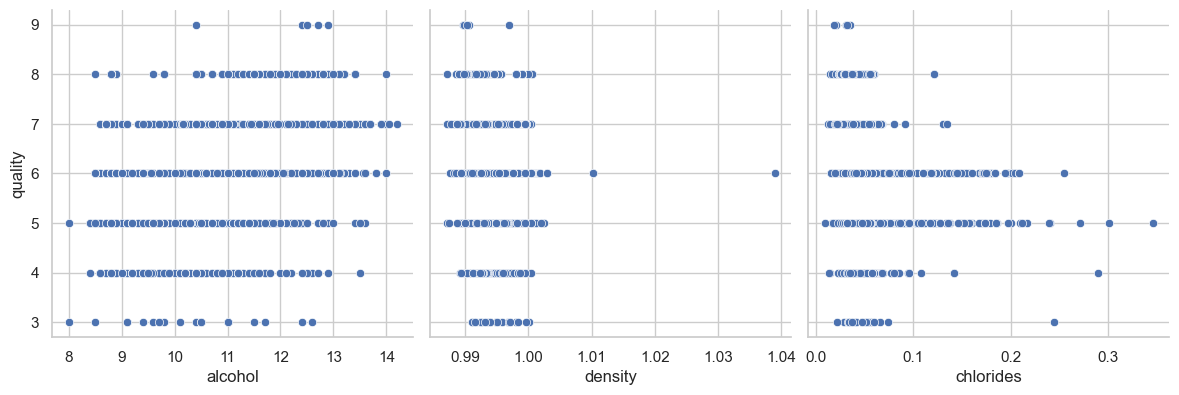

In [45]:
s = sns.pairplot(x_vars = ['alcohol','density','chlorides'], y_vars = 'quality', 
                 data = wine_imputed, kind = 'scatter',
                 height = 4, diag_kind = 'kde')
plt.show();

In [46]:
X = wine_imputed.drop(["quality"], axis = 1).values      
y = wine_imputed["quality"].values  

In [47]:
X.shape, y.shape

((4898, 11), (4898,))

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
X_train.shape, y_train.shape

((3918, 11), (3918,))

In [50]:
X_test.shape, y_test.shape

((980, 11), (980,))

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  

X_train_std = scaler.fit_transform(X_train)   
X_test_std = scaler.fit_transform(X_test)

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [53]:
def Polynomial_Regression(n) :
    
    poly_val = PolynomialFeatures(degree = n)          
    
    X_train_poly = poly_val.fit_transform(X_train_std)
    
    poly_reg = LinearRegression()
    
    poly_reg.fit(X_train_poly, y_train)
    
    X_test_poly = poly_val.fit_transform(X_test_std)

    y_test_poly_pred = poly_reg.predict(X_test_poly)
    
    return r2_score(y_test,  y_test_poly_pred)

In [54]:
Polynomial_Regression(1)

0.2657257641312304

In [55]:
Polynomial_Regression(2)

0.25828998037922235

In [56]:
Polynomial_Regression(3)

-0.484728637083619

In [57]:
poly_features = PolynomialFeatures(degree = 1)

X_train_poly = poly_features.fit_transform(X_train_std)
X_test_poly = poly_features.fit_transform(X_test_std)

In [58]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [59]:
y_train_poly_pred = poly_reg.predict(X_train_poly)

In [60]:
r2_score(y_train, y_train_poly_pred)

0.2841993374677889

In [61]:
y_test_poly_pred = poly_reg.predict(X_test_poly)

In [62]:
r2_score(y_test, y_test_poly_pred)

0.2657257641312304

In [63]:
def plot_learning_curves(scale, model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    X_train_std = scale.fit_transform(X_train)  
    X_test_std = scale.fit_transform(X_test)
    
    train_errors, test_errors = [], []
    
    for m in range(1, len(X_train_std)):
        model.fit(X_train_std[:m], y_train[:m])
        
        y_train_pred = model.predict(X_train_std[:m])
        y_test_pred = model.predict(X_test_std)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    plt.plot(np.sqrt(train_errors), "r-", linewidth = 2, label = "train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth = 2, label = "test")
    
    plt.legend(loc = "best", fontsize = 14)   
    
    plt.xlabel("Training set size", fontsize = 14) 
    plt.ylabel("RMSE", fontsize = 14)

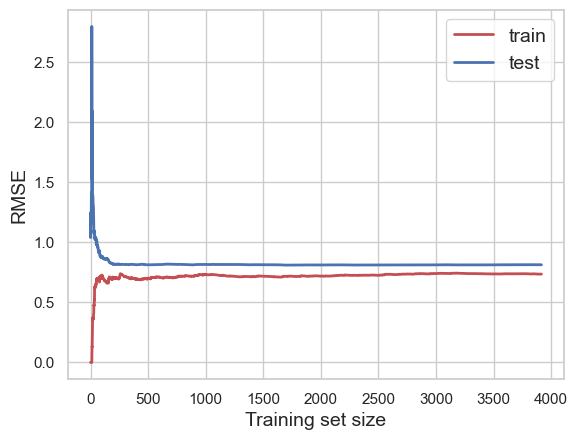

In [64]:
plot_learning_curves(scaler, poly_reg, X, y)

In [65]:
from sklearn.tree import DecisionTreeRegressor

dic_reg = DecisionTreeRegressor()

dic_reg.fit(X_train_std, y_train)

DecisionTreeRegressor()

In [66]:
y_train_dic_pred = dic_reg.predict(X_train_std)  

In [67]:
r2_score(y_train, y_train_dic_pred)

1.0

In [68]:
y_test_dic_pred = dic_reg.predict(X_test_std)  

In [69]:
r2_score(y_test, y_test_dic_pred)

0.03686992809933798

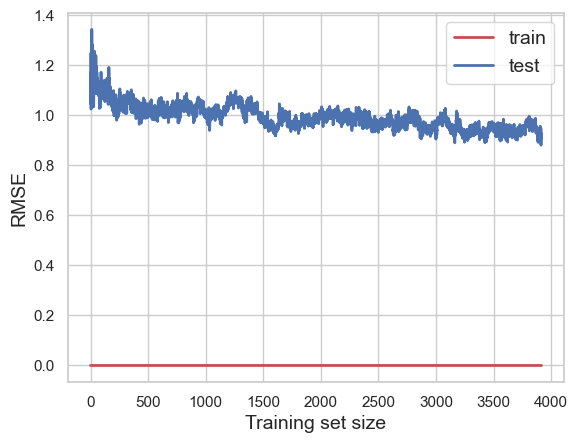

In [72]:
plot_learning_curves(scaler, dic_reg, X, y)